# *`10_KNearest Neighbors`*

The k-nearest neighbors (KNN) algorithm is a supervised learning method used for classification and regression. It is based on the idea that similar data points have similar labels or values.

**KNN Intuition**

*`You are the average of 5 people you spend the most time with. ~ Jim Rohn`*

KNN is based on the theory that you are like your neighbors.

A $k$ value is decided which represents how many neighbors are to be considered.

Let's consider the below data for classification and steps to predict the label for the data:

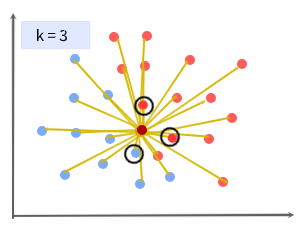

1. Suppose, there is a datapoint coming for classification.
2. We calculate the distances from the data point to all the other data points.
3. Sort the distances in ascending order, then pick top $k$ closest distances.
4. Check the class labels of the selected points.
5. Based on the majority, class label is selected for the data point.

```
It is advisable in KNN, that you bring the data on one scale because KNN depends on distance.
```

**How to select the value of k?**

Based on the data there are two main approaches:
1. Heuristic: $n$ = no. of observations.
   Let's say we have 400 rows in our data
   $k = \sqrt 400 = 20$

2. Experimentation: In experimentation we make use of cross validation.

> **Cross Validation**

* $n = 1000$ where, Training dataset = $800$ and Testing dataset = $200$
* You train a new knn for every of $k$ varying from $k = 1, 2, 3, 4...., 25$.
* Calculate the accuracy and select the model whose accuracy is the highest.

> **Decision Surface**

It is a tool to understand decision boundary of the classification algorithm.

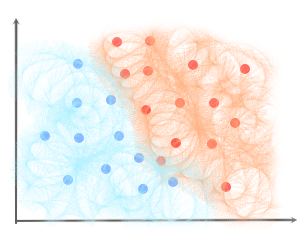

You plot the training data, find a $x$ range and $y$ range.

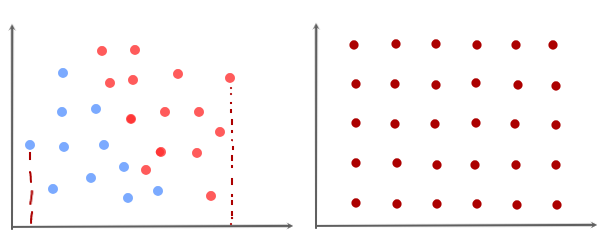

* Create a meshgrid with numpy in the ranged region.
* Train the KNN model and then pass the meshgrid into the model.
  * If KNN says $1$ then encode the point as Blue else orange.
* Finally, visualize these points as pixel on an image.

> **Overfitting and Underfitting in KNN**

*Overfitting*
* When $k$ is small overfitting happens.

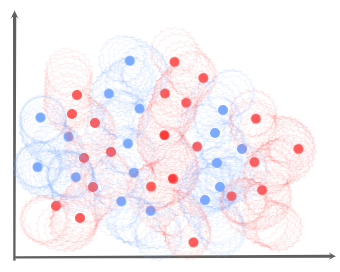

*Underfitting*
* Max alue of $k$ can be $n$. If 200 rows are there in the dataset then $k = 200$.

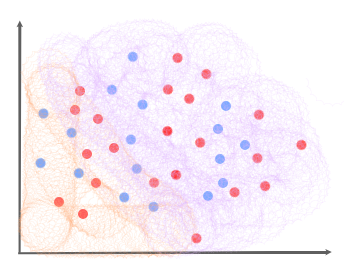

* A high value of $k$ will lead to underfitting. Whole will be the data boundary and based on the majority the data point will be classified.
* No matter where the data point lies it will always be the majority class.


### Limitations of KNN

> **When KNN fails**

* *Large Datasets*: $rows = 5 \text lakh$, $features = 100$.

    $shape (500000, 100)$
  1. KNN is a lazy learning model.
  2. At the time of training there is nothing that the model learns.
  3. Everything happens at the time of making predictions.
  4. It needs to calculate 5 Lakh distances and sort them. The majority will take a lot of time.

* *High Dimensional data*: $features = 500$.
  1. The curse of dimentionality. The distance are not reliable in higher dimension.
  2. KNN does not work well with outliers. It is sensitive to outliers.

* *Non - homogeneuos feature scale*: One feature dominates other feature.

* *Imabalanced dataset*: $1 - 98$% , $0 - 2$%. It will produce biased output.

* *Inference and not for prediction*: KNN is not good for Inference but for prediction.
KNN will not be able to explain which input helped in predicting $y$. It can simply classify the output.

In [46]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Make toy dataset
dataset = make_classification(n_samples = 1000, n_features = 15, n_informative = 2, n_classes = 2, n_clusters_per_class =2)

# Convert it into pandas dataframe
df = pd.DataFrame(dataset[0], columns = [f"X{i}" for i in range(1,16)])
df['target'] = dataset[1]

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,target
0,2.238207,0.189039,-1.427146,0.513273,0.280156,-1.518433,-1.546138,0.457131,-0.841241,-0.272792,0.163362,-0.996725,-0.482679,1.044041,-1.783294,0
1,1.666714,-2.196650,1.459221,0.932805,-0.955001,-0.205250,0.004705,0.238993,-1.100775,1.291043,-1.418205,2.200938,0.030874,2.066372,1.024640,0
2,1.309211,-0.485262,-1.270727,-0.648031,1.672229,0.426827,0.790869,-0.441003,0.122964,0.158680,1.097269,-1.778530,-1.410373,2.308264,-1.730837,1
3,-0.228366,-1.697477,0.999072,0.121386,0.191511,-1.262623,0.882793,0.387515,-1.750814,-0.255933,0.547054,0.608858,-0.432852,0.714647,-1.430026,0
4,-0.859630,0.224645,-0.612484,1.201131,-1.667575,0.271223,-1.283994,0.207035,0.222230,0.928608,0.328142,-1.775311,-0.535096,-1.106091,2.380534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.357167,0.096340,-0.093687,-0.651642,-1.935105,-0.841973,0.947678,0.626571,-0.978381,-0.021520,2.012909,0.131479,0.263027,-0.721585,1.676029,0
996,0.503551,-0.767505,-0.983983,-0.536279,-1.955556,-0.555593,0.051739,0.534575,0.581024,-0.078936,-0.921914,-0.049315,0.596186,1.330144,1.971077,0
997,-0.077943,-0.676123,-0.384205,0.110638,0.675464,-2.216981,0.229333,0.619882,-0.155604,-0.620033,1.642654,1.809002,-0.505132,0.260493,-2.943321,0
998,1.385352,-1.551210,0.299236,-0.974626,-3.154170,-0.573790,0.299924,0.754574,-1.053955,-0.030131,0.014147,-0.003426,0.587747,1.201488,3.481957,1


In [48]:
df['target'].value_counts()

1    505
0    495
Name: target, dtype: int64

In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.2, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

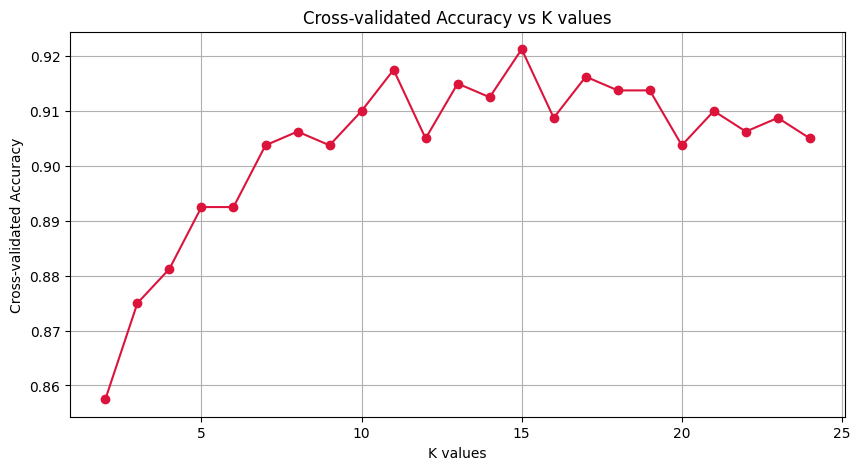

In [77]:
import matplotlib.pyplot as plt

# Let's run KNN for several values of K and find the best k value
cv_scores = []
for k in range(2, 25):
    # Instantiate the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train model with cv of 5
    cv_score = cross_val_score(knn, X_train, y_train, cv=5)

    # Print each cv score (accuracy) and average them
    cv_scores.append(np.mean(cv_score))

# Plot the CV scores against k values
plt.figure(figsize = (10, 5))
plt.plot(range(2, 25), cv_scores, color='crimson', marker='o', linestyle='-')
plt.xlabel('K values')
plt.ylabel('Cross-validated Accuracy')
plt.title('Cross-validated Accuracy vs K values')
plt.grid(True)
plt.show()


In [74]:
import plotly.graph_objects as go

# Find the index of the maximum accuracy
max_index = cv_scores.index(max(cv_scores))

# Create a Plotly figure
fig = go.Figure()

# Add a line trace for CV scores
fig.add_trace(go.Scatter(x=list(range(2, len(cv_scores) + 2)), y=cv_scores, mode='lines', marker=dict(color='navy')))

# Add a vertical line for the highest accuracy
fig.add_shape(type="line", x0=max_index + 2, y0=min(cv_scores), x1=max_index + 2, y1=max(cv_scores), line=dict(color="crimson", width=2, dash="dash"))

# Update layout
fig.update_layout(title='CV Score vs K values',
                  xaxis_title='K values',
                  yaxis_title='Accuracy')

# Show the plot
fig.show()

In [80]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Train the KNN
knn.fit(X_train, y_train)

# Print each cv score (accuracy) and average them
print(f"Best accuracy score on training data: {knn.score(X_train, y_train)}")

# Evaluate the model on the test data
print(f"Best accuracy score on testing data: {knn.score(X_test, y_test)}")

Best accuracy score on training data: 0.93
Best accuracy score on testing data: 0.905


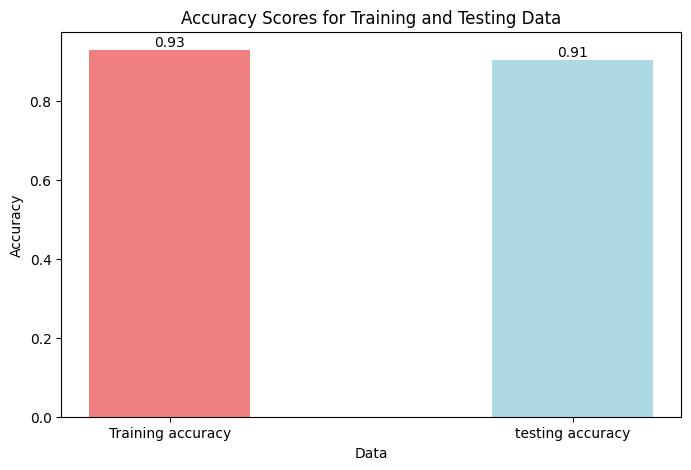

In [102]:
# plot the accuracy scores for both Training and testing data
plt.figure(figsize = (8, 5))
plt.bar(['Training accuracy', 'testing accuracy'], list([knn.score(X_train, y_train), knn.score(X_test, y_test)]), color = ['lightcoral', 'lightblue'], width = 0.4)

# Annotate each bar with its value
for i, score in enumerate(list([knn.score(X_train, y_train), knn.score(X_test, y_test)])):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Training and Testing Data')
plt.show()